Please **submit this Jupyter notebook through Canvas** no later than **Friday December 14, 10:59**, before the start of the lecture.

The final project is in **groups of three**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

A single, jointly written report for each group is fine. All members in a group will receive the same grade.

# Exercise 0
Write down the names + student ID of the people in your group.

__Jier Nzuanzu__ <br>  - 10223258 

__Lennart Mettrop__ <br> - 10432973

__Tharangni Harsha Sivaji__ <br> - 11611065

----
# Project keywords
ODEs, time integration

----
# Project description
There is a wide variety of mathematical models for time-evolving systems formulated as sets of coupled ordinary differential equations (ODEs). Examples range from meteorology and population dynamics to celestial mechanics and chemical reactions. In many cases, these ODEs cannot be solved analytically, and instead they are simulated by means of numerical time integration. In this assignment we will explore various various time integration methods.



We consider a very simple system, one where we know the exact (analytical) solution so that we can easily compare results from numerical integration with the exact solution. The set of ODEs
$$\begin{array}{rcl}
\frac{dx}{dt} & = & y, \\
\frac{dy}{dt} & = & -\omega^2 \, x
\end{array}$$
are the equations for the $\textit{harmonic oscillator}$. This is a Hamiltonian system for which the Hamiltonian (or total energy) is given by $H=\tfrac12 (y^2 + \omega^2 \, x^2)$. 

----
# Project exercises
## Exercise 1
Read sections 9.1-9.3 from the book by Heath.

----
## Exercise 2
Solve the ODEs for the harmonic oscillator. Write down exact expressions for $x(t)$ and $y(t)$ given an arbitrary initial condition $x(t=0)=x_0, \, y(t=0)=y_0$. Make sure you solution is correct, as this will be your benchmark to compare numerical solutions against.

First we rewrite the differential equations as a matrix $A$:
\begin{align*}
    \begin{pmatrix}
\frac{dx}{dt} \\
\frac{dy}{dt} 
\end{pmatrix} = 
\begin{pmatrix}
0 & 1 \\
-\omega^2 & 0 
\end{pmatrix}\begin{pmatrix}
x \\
y 
\end{pmatrix}.
\end{align*}

To find a general solution, we have to find the eigenvalues and eigenvectors. So we check when the determinant equals $0$:
\begin{align*}
    det\begin{pmatrix}
-\lambda & 1 \\
-\omega^2 & -\lambda 
\end{pmatrix} = \lambda^2+\omega^2=0 \iff \lambda=\omega i \;\text{ or }\;\lambda=-\omega i.
\end{align*}

So we find two eigenvalues $\lambda_1=\omega i$ and $\lambda_2=-\omega i$. We find the corresponding eigenvectors $v_1$ and $v_2$:
\begin{align*}
    \lambda_1 \to v_1=\begin{pmatrix}
1 \\
\omega i 
\end{pmatrix}, \;\;\;\;\;\lambda_2\to v_2=\begin{pmatrix}
1 \\
-\omega i 
\end{pmatrix}.
\end{align*}

A general solution is given by:
\begin{align*}
    x(t)=c_1e^{\omega i\cdot t}\begin{pmatrix}
1 \\
\omega i 
\end{pmatrix} + c_2e^{-\omega i\cdot t}\begin{pmatrix}
1 \\
-\omega i 
\end{pmatrix}.
\end{align*}

To find the values for the constants $c_1$ and $c_2$, we use the fact that $x(0)=x_0$ and $y(0)=y_0$. So we check when $x(0)$ equals to $(x_0\;\;y_0)^T$. In the following equation we used that $e^{\pm\omega i\cdot 0}=e^0=1$, so we have:
\begin{align*}
    \begin{bmatrix}
c_1 & c_2 \\
c_1\omega i & -c_2\omega i 
\end{bmatrix}=\begin{bmatrix}
x_0 \\
y_0 
\end{bmatrix},
\end{align*}
so:
\begin{align*}
    x_0 &= c_1 + c_2\\
    y_0 &= \omega i(c_1-c_2).
\end{align*}
Solving these equations gives us:
\begin{align*}
    c_1 &= \frac{1}{2} x_0 -\frac{i}{2\omega}y_0\\
    c_2 &= \frac{1}{2} x_0 + \frac{i}{2\omega}y_0.
\end{align*}

Remember the following rules:
\begin{align*}
    \cos(\theta) &= \frac{1}{2}\big(e^{+i\theta}+e^{-i\theta}\big)\\[5pt]
    \sin(\theta) &= \frac{1}{2i}\big(e^{+i\theta}-e^{-i\theta}\big)
\end{align*}

Finally, we can use the results for $c_1$ and $c_2$ to get the formulas for $x(t)$ and $y(t)$ using above rules for the cosinus and sinus. We get:
\begin{align*}
    \begin{bmatrix}
x(t) \\
y(t) 
\end{bmatrix} &= \begin{bmatrix}
\big(\frac{1}{2}x_0-\frac{i}{2\omega}y_0\big)e^{\omega i\cdot t} +  \big(\frac{1}{2}x_0+\frac{i}{2\omega}y_0\big)e^{-\omega i\cdot t}\\
\omega i\big(\frac{1}{2}x_0-\frac{i}{2\omega}y_0\big)e^{\omega i\cdot t} -  \omega i\big(\frac{1}{2}x_0+\frac{i}{2\omega}y_0\big)e^{-\omega i\cdot t} 
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
\frac{1}{2}\bigg(\big(x_0-\frac{i}{\omega}y_0\big)e^{\omega i\cdot t} +  \big(x_0+\frac{i}{\omega}y_0\big)e^{-\omega i\cdot t}\bigg)\\
\frac{1}{2}\bigg(\big(-\frac{\omega}{i}x_0+y_0\big)e^{\omega i\cdot t} - \big(-\frac{\omega}{i}x_0-y_0\big)e^{-\omega i\cdot t} \bigg)
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
x_0\frac{1}{2}\big(e^{\omega t\cdot i}+e^{-\omega t\cdot i}\big)+\frac{y_0}{\omega}\frac{1}{2i}\big(e^{\omega t\cdot i} - e^{-\omega t\cdot i}\big)\\
-\omega x_0\frac{1}{2i}\big(e^{\omega t\cdot i}-e^{-\omega t\cdot i}\big)+y_0\frac{1}{2}\big(e^{\omega t\cdot i} + e^{-\omega t\cdot i}\big)
\end{bmatrix}\\[5pt]
&=\begin{bmatrix}
x_0\cos(\omega t)+\frac{y_0}{\omega}\sin(\omega t)\\
y_0\cos(\omega t)-\omega x_0\sin(\omega t)
\end{bmatrix}
\end{align*}

----
## Exercise 3
Prove that the Hamiltonian is a conserved quantity, i.e. $H$ remains constant in time.

When we fill in the formulas of $x(t)$ and $y(t)$ we found in the previous exercise, we get for $H$:
\begin{align*}
    H&=\frac12 \big(y(t)^2 + \omega^2 \, x(t)^2\big)\\[5pt]
    &=\frac{1}{2}\bigg(\big(y_0\cos(\omega t)-\omega x_0\sin(\omega t)\big)^2+\omega^2\big(x_0\cos(\omega t)+\frac{y_0}{\omega}\sin(\omega t)\big)^2\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(y_0^2\cos(\omega t)^2-\omega^2x_0^2\sin(\omega t)^2 - 2y_0x_0\cos(\omega t)\sin(\omega t)+\omega^2x_0^2\cos(\omega t)^2\\[5pt]
    &\;\;\;\;\;\;y_0^2\sin(\omega t)^2 + 2x_0y_0\cos(\omega t)\sin(\omega t)\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(\omega^2x_0^2\big(\cos(\omega t)^2 + \sin(\omega t)^2\big) + y_0^2\big(\cos(\omega t)^2 + \sin(\omega t)^2\big)\bigg)\\[5pt]
    &=\frac{1}{2}\bigg(\omega^2x_0^2 + y_0^2\bigg)
\end{align*}

As all the terms depending on $t$ have been ruled out, $H$ stays constant over time. So it's a conserved quantity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.pyplot import plot, draw, show
from scipy.linalg import lu
import scipy.linalg as la
import random
import simpy
import math
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [15, 18]

def plotpretify(ax, maxx, minx=0):
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        top=False,
        labelbottom=True,
        left=False,
        right=False,
        labelleft=True)
    ax.grid(True)
    
    ax.set_xlim(minx, maxx)

----
## Exercise 4
Set $\omega=1$. Use the forward Euler scheme to integrate the ODEs in time, from $t=0$ to $t=50$, with initial condition e.g. $(x_0,y_0)=(1,0)$. What is you time step $\Delta t$? Compare your numerical solution with the exact solution: make a plot of $x(t)$ versus $t$ for both solutions, and plot $H$ versus $t$. Pick a set of initial conditions (e.g. the corners of a square, $(x_0, y_0) = (1\pm 0.5, \pm 0.5)$), integrate these forward up to $t=10$, and plot the paths $(x(t),y(t))$. Compare with the exact solution.

In [3]:
def dx(y, t):
    return y


def dy(x, t, w=1):
    return -w**2 * x


def f(x, t, w=1):
    return [dx(x[1], t), dy(x[0], t, w)]

In [4]:
def feuler(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    x0 = np.array(init[:])
    result = np.zeros((t+1, 2))
    for i, r in enumerate(np.linspace(T[0],T[1],t+1)):
        x1 = x0 + h * np.array(f(x0, r, w))
        x0 = x1
        result[i][0] = x1[0]
        result[i][1] = x1[1]
    return result

In [5]:
def H(t, x0, y0, w=1):
    return (1 / 2) * (np.power(y(t, x0, y0, w), 2) +
                      np.power(w, 2) * np.power(x(t, x0, y0, w), 2))

In [6]:
def x(t, x0, y0, w=1):
    return x0 * np.cos(w * t) + (1 / w) * y0 * np.sin(w * t)


def y(t, x0, y0, w=1):
    return y0 * np.cos(w * t) - w * x0 * np.sin(w * t)

At time step $\Delta t = 0.1$

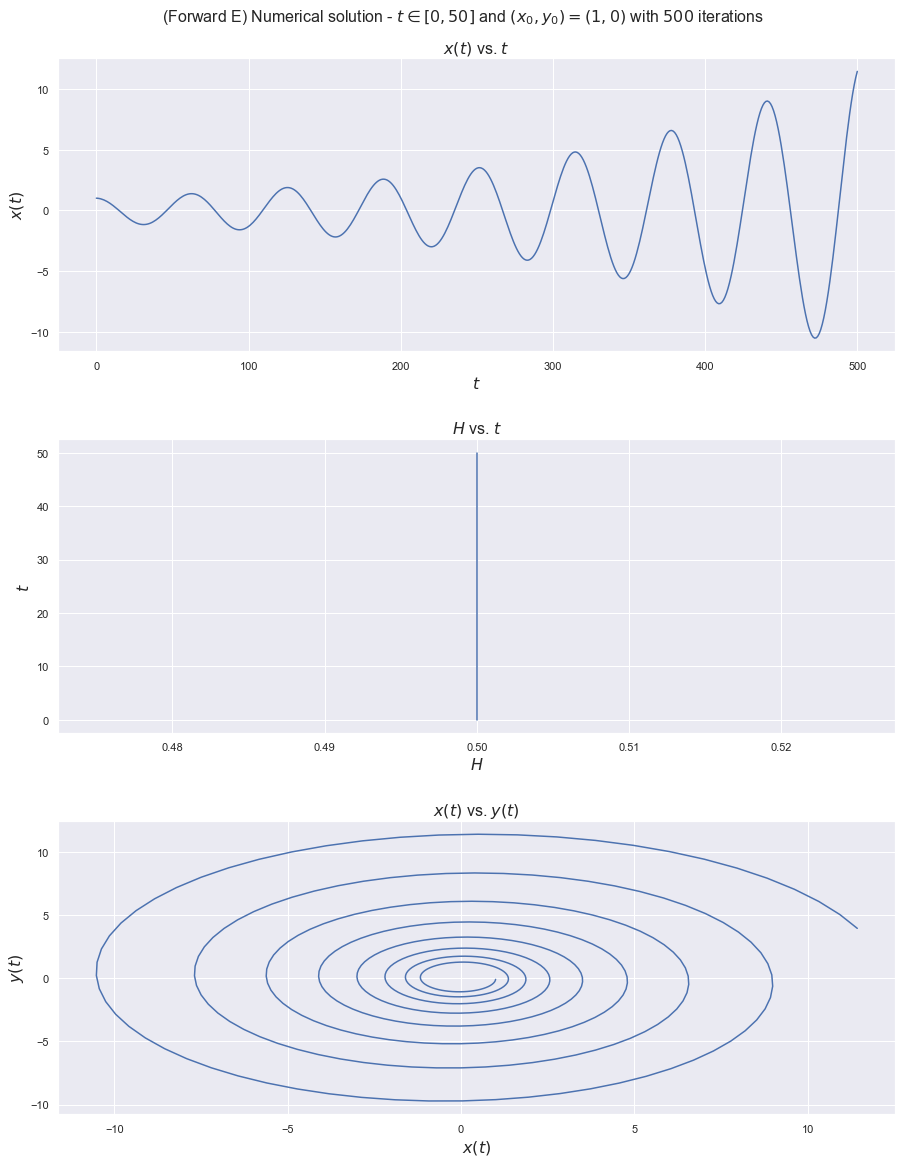

In [7]:
result = feuler(f, t=500)

start = (1, 0)
T = [0, 50]
t = 500
x_H_list = np.linspace(T[0], T[1], t + 1)
H_list = [H(t, start[0], start[1]) for t in x_H_list]


sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot(311)
ax2.plot(result[:,0])
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)

ax3 = plt.subplot(312)
ax3.plot(H_list, x_H_list)
ax3.set_xlabel("$H$", fontsize=16)
ax3.set_ylabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16);

ax = plt.subplot(313)
ax.plot(result[:,0], result[:,1])
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)

plt.suptitle("(Forward E) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

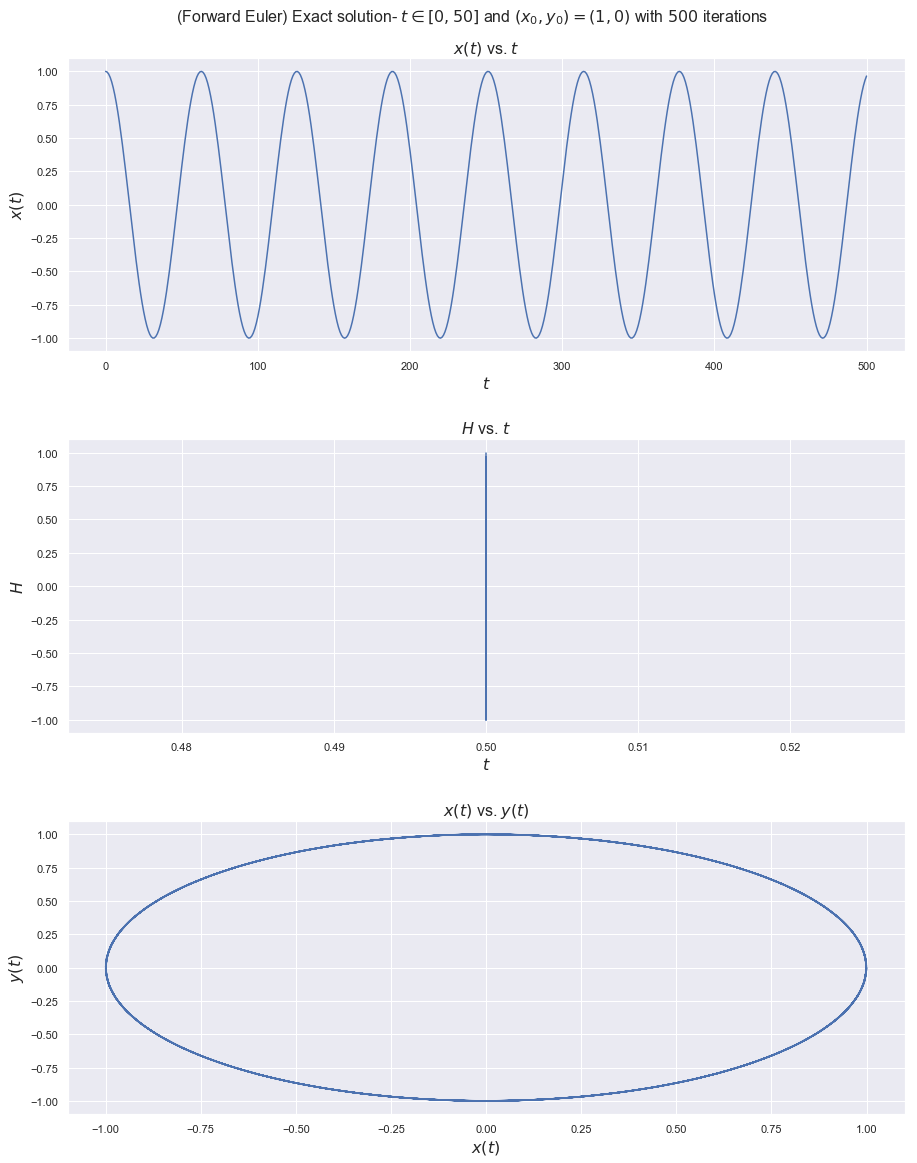

In [8]:
start = (1, 0)
T = [0, 50]
t = 500
xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
H_list = [H(t, start[0], start[1]) for t in xlist]


sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot(311)
ax2.plot(xlist)
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)

ax3 = plt.subplot(312)
ax3.plot(H_list, xlist)
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16);

ax = plt.subplot(313)
ax.plot(xlist, ylist)
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)

plt.suptitle("(Forward Euler) Exact solution- $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

At time step $\Delta t = 0.001$

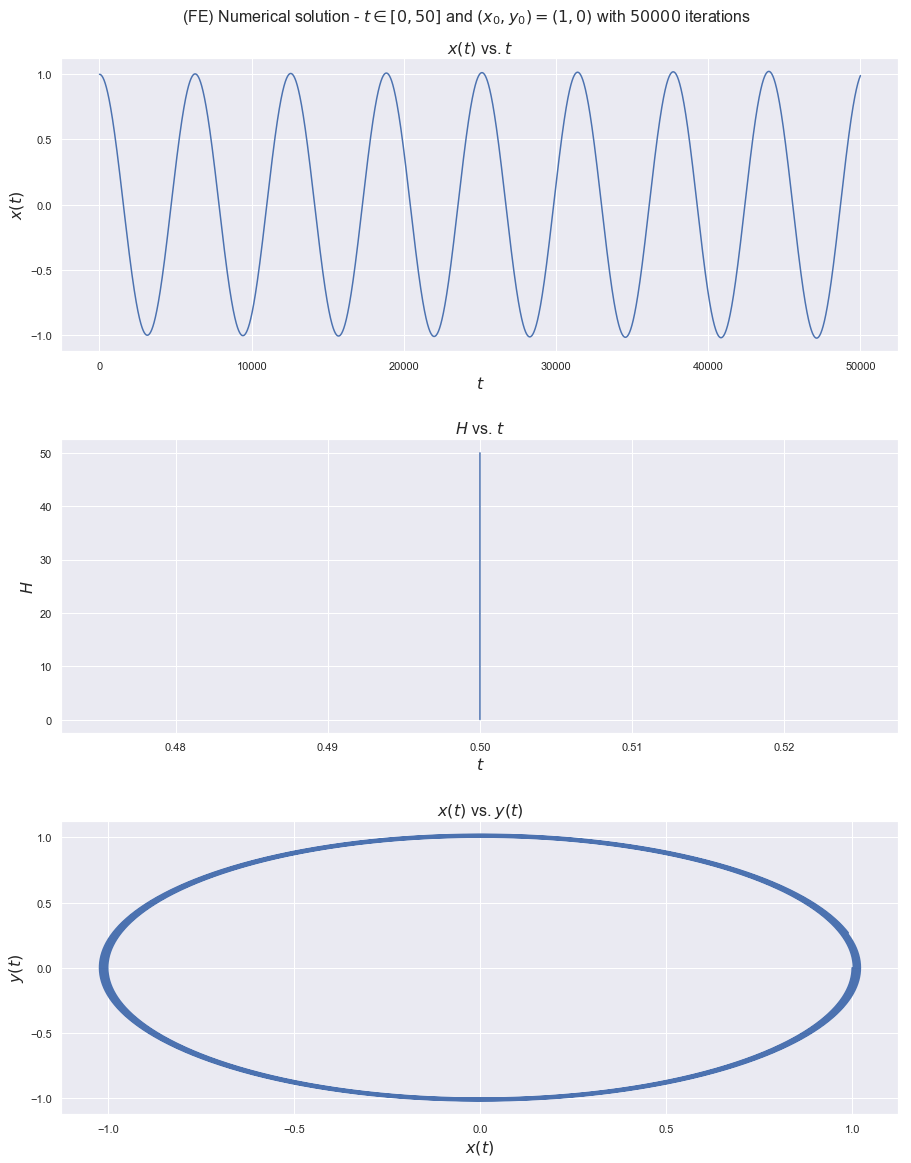

In [9]:
result = feuler(f, t=50000)

start = (1, 0)
T = [0, 50]
t = 50000
x_H_list = np.linspace(T[0], T[1], t + 1)
H_list = [H(t, start[0], start[1]) for t in x_H_list]


sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot(311)
ax2.plot(result[:,0])
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)

ax3 = plt.subplot(312)
ax3.plot(H_list, x_H_list)
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16);

ax = plt.subplot(313)
ax.plot(result[:,0], result[:,1])
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)

plt.suptitle("(FE) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50000$ iterations", fontsize=16);

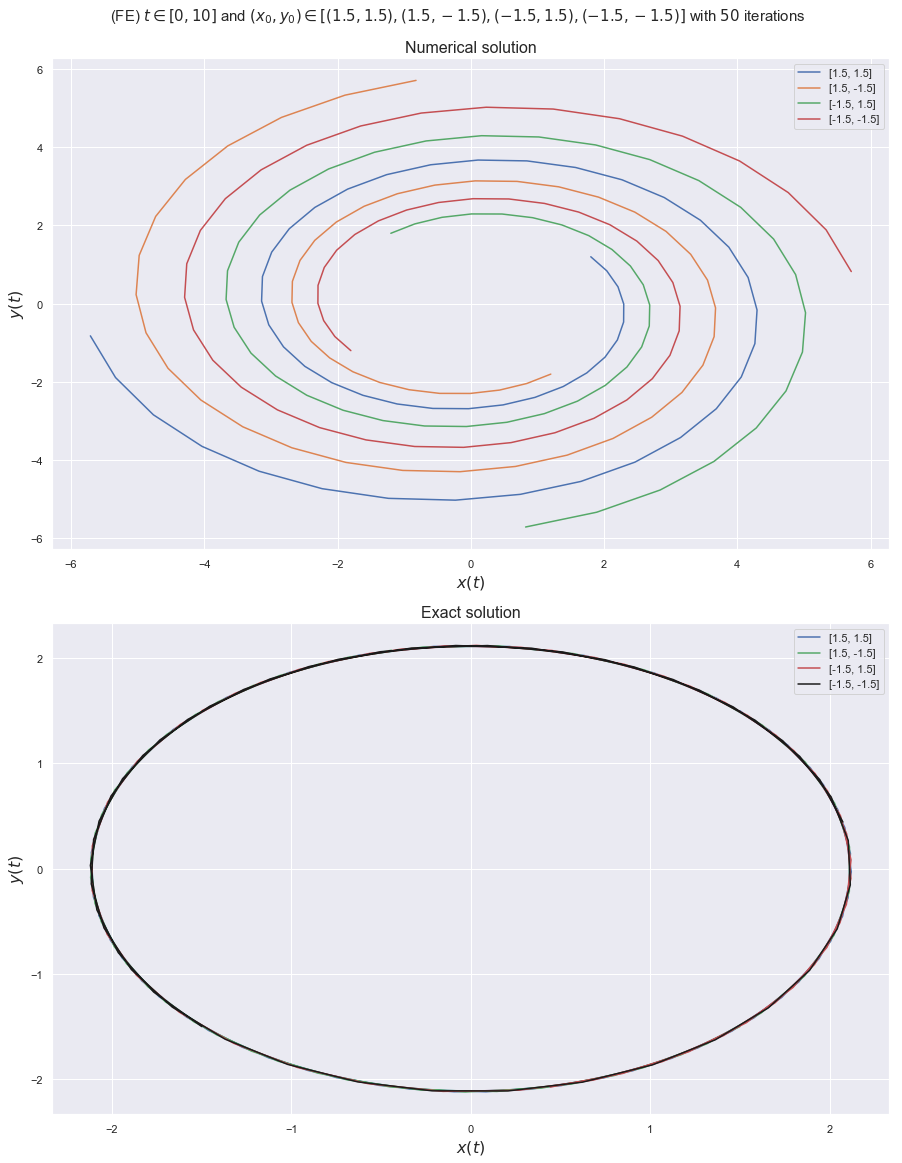

In [10]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=50)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=50)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=50)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=50)

T = [0, 10]
t = 50
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
ax.set_title("Numerical solution", fontsize=16)


#TODO: increase thickness for readability
ax2 = plt.subplot(212)
ax2.plot(xlist1, ylist1, color="b", label = "[1.5, 1.5]")
ax2.plot(xlist2, ylist2, color="g", label = "[1.5, -1.5]")
ax2.plot(xlist3, ylist3, color="r", label = "[-1.5, 1.5]")
ax2.plot(xlist4, ylist4, color="k", label = "[-1.5, -1.5]")
ax2.set_xlabel("$x(t)$", fontsize=16)
ax2.set_ylabel("$y(t)$", fontsize=16)
ax2.legend()
ax2.set_title("Exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $50$ iterations", fontsize = 15);

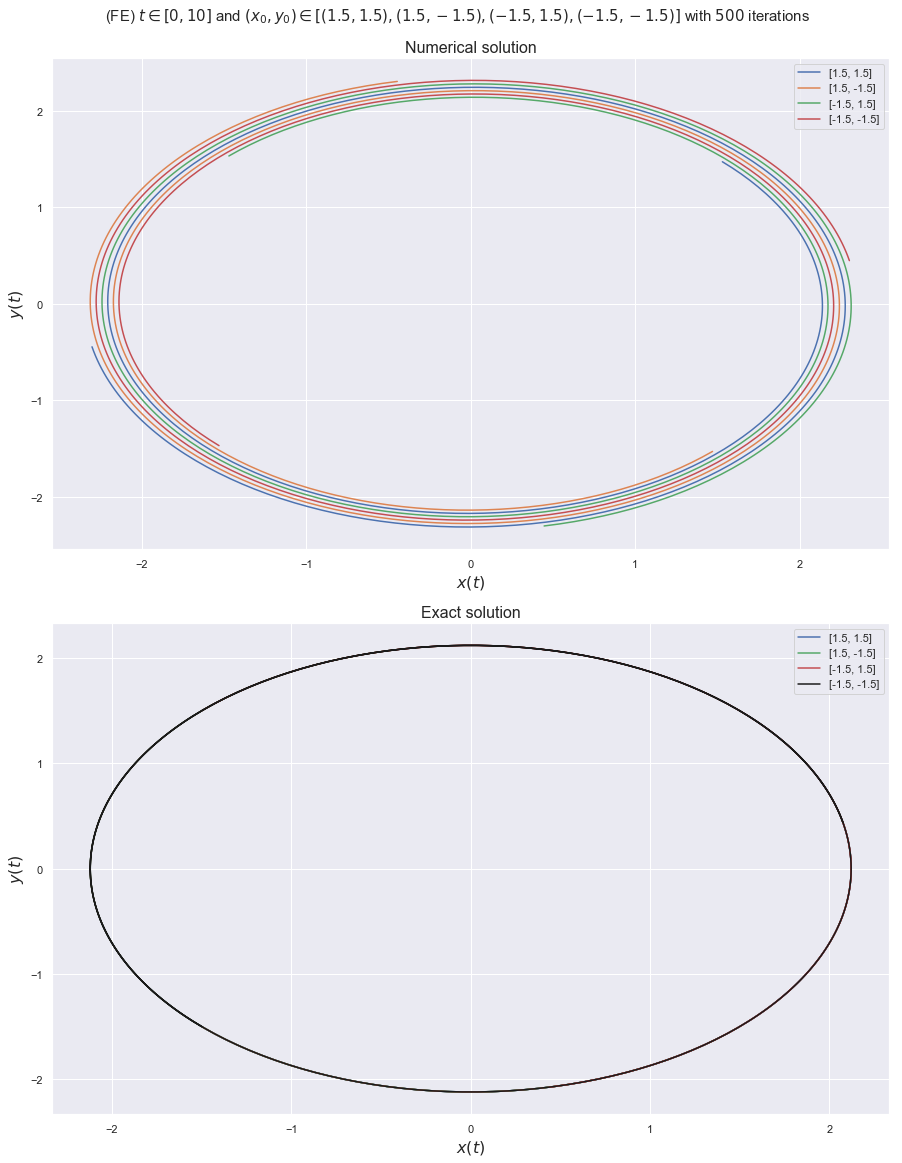

In [11]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=500)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=500)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=500)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=500)

T = [0, 10]
t = 500
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
ax.set_title("Numerical solution", fontsize=16)

ax2 = plt.subplot(212)
ax2.plot(xlist1, ylist1, color="b", label = "[1.5, 1.5]")
ax2.plot(xlist2, ylist2, color="g", label = "[1.5, -1.5]")
ax2.plot(xlist3, ylist3, color="r", label = "[-1.5, 1.5]")
ax2.plot(xlist4, ylist4, color="k", label = "[-1.5, -1.5]")
ax2.set_xlabel("$x(t)$", fontsize=16)
ax2.set_ylabel("$y(t)$", fontsize=16)
ax2.legend()
ax2.set_title("Exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $500$ iterations", fontsize = 15);

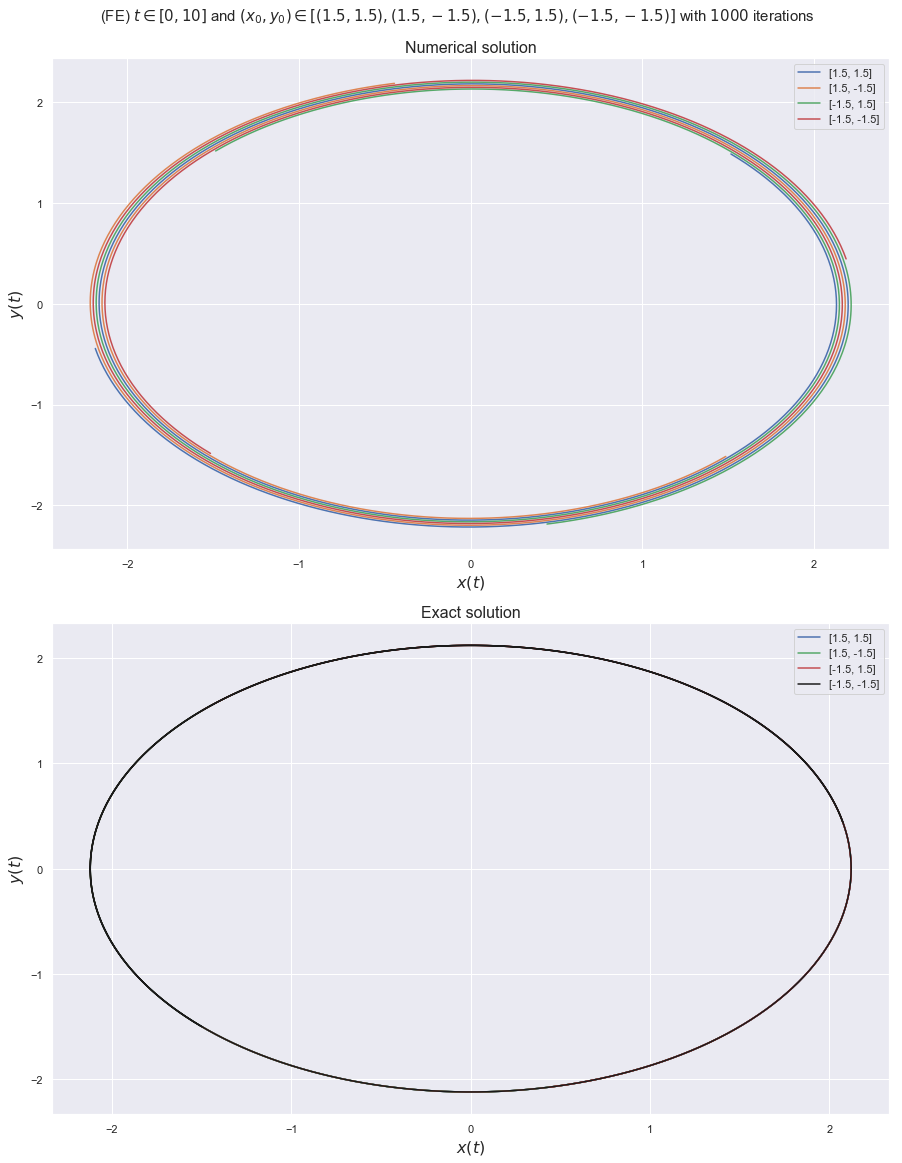

In [12]:
result1 = feuler(f, init=[1.5, 1.5], T=[0,10], t=1000)
result2 = feuler(f, init=[1.5, -1.5], T=[0,10], t=1000)
result3 = feuler(f, init=[-1.5, 1.5], T=[0,10], t=1000)
result4 = feuler(f, init=[-1.5, -1.5], T=[0,10], t=1000)

T = [0, 10]
t = 1000
start = (1.5, 1.5)
xlist1 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist1 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (1.5, -1.5)
xlist2 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist2 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, 1.5)
xlist3 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist3 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
start = (-1.5, -1.5)
xlist4 = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist4 = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]

sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.15)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax = plt.subplot(211)
ax.plot(result1[:,0], result1[:,1], label = "[1.5, 1.5]")
ax.plot(result2[:,0], result2[:,1], label = "[1.5, -1.5]")
ax.plot(result3[:,0], result3[:,1], label = "[-1.5, 1.5]")
ax.plot(result4[:,0], result4[:,1], label = "[-1.5, -1.5]")
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.legend()
ax.set_title("Numerical solution", fontsize=16)

ax2 = plt.subplot(212)
ax2.plot(xlist1, ylist1, color="b", label = "[1.5, 1.5]")
ax2.plot(xlist2, ylist2, color="g", label = "[1.5, -1.5]")
ax2.plot(xlist3, ylist3, color="r", label = "[-1.5, 1.5]")
ax2.plot(xlist4, ylist4, color="k", label = "[-1.5, -1.5]")
ax2.set_xlabel("$x(t)$", fontsize=16)
ax2.set_ylabel("$y(t)$", fontsize=16)
ax2.legend()
ax2.set_title("Exact solution", fontsize=16)

plt.suptitle("(FE) $t\in[0,10]$ and $(x_0,y_0) \in [(1.5,1.5),(1.5,-1.5),(-1.5,1.5),(-1.5,-1.5)]$ with $1000$ iterations", fontsize = 15);

----
## Exercise 5
Experiment with changing the integration time step $\Delta t$. Assess the convergence by plotting the norm of the error (at some fixed time, e.g. $t=1$) versus $\Delta t$, over several orders of magnitude of $\Delta t$. Can you see that Euler's method is 1st order accurate?

In [13]:
#TODO: bring the cells down

----
## Exercise 6
Repeat the experiments above, but now with the backward Euler scheme.

In [14]:
from scipy.optimize import fsolve

def dxdx(x, y, t, w=1):
    return -w**2*x

def dydy(x, y, t, w=1):
    return -w**2 * y

def dxdy(x, y, t, w=1):
    return -w**2*x

def dydx(x, y, t, w=1):
    return -w**2 * y

def df(x, t, w=1):
    return [dxdx(x[0], x[1], t, w), dydy(x[0], x[1], t, w)]

def hulpf(x1, x0, h, r, w=1):
    return x1 - x0 + h * np.array(f(x1, r + h, w))

def hulpdf(x1, x0, h, r, w=1):
    return 1 + h * np.array(df(x1, r + h, w))

def newtong(x1, x0, h, r, w=1):
#     print(hulpf(x1, x0, h, r, w))
#     print(hulpdf(x1, x0, h, r, w))
#     print(hulpf(x1, x0, h, r, w)/hulpdf(x1, x0, h, r, w))
#     print("-----")
    return x1 - hulpf(x1, x0, h, r, w) / hulpdf(x1, x0, h, r, w)

def newton(xstart, x0, h, r, w=1, tol=10**-9):
    x = xstart
#     print(any(k > tol for k in np.abs(hulpf(x, x0, h, r, w))))
    while any(k > tol for k in np.abs(hulpf(x, x0, h, r, w))):
        x = newtong(x, x0, h, r, w)
    return x

def beuler(f, init=[1, 0], T=[0, 50], t=50, w=1):
    h = (T[1] - T[0]) / t
    x0 = np.array(init[:])
    result = np.zeros((t+1, 2))
    for i, r in enumerate(np.linspace(T[0],T[1],t+1)):
        x1 = newton(x0, x0, h, r, w=1, tol=10**-9)
        x0 = x1
        result[i][0] = x1[0]
        result[i][1] = x1[1]
    return result

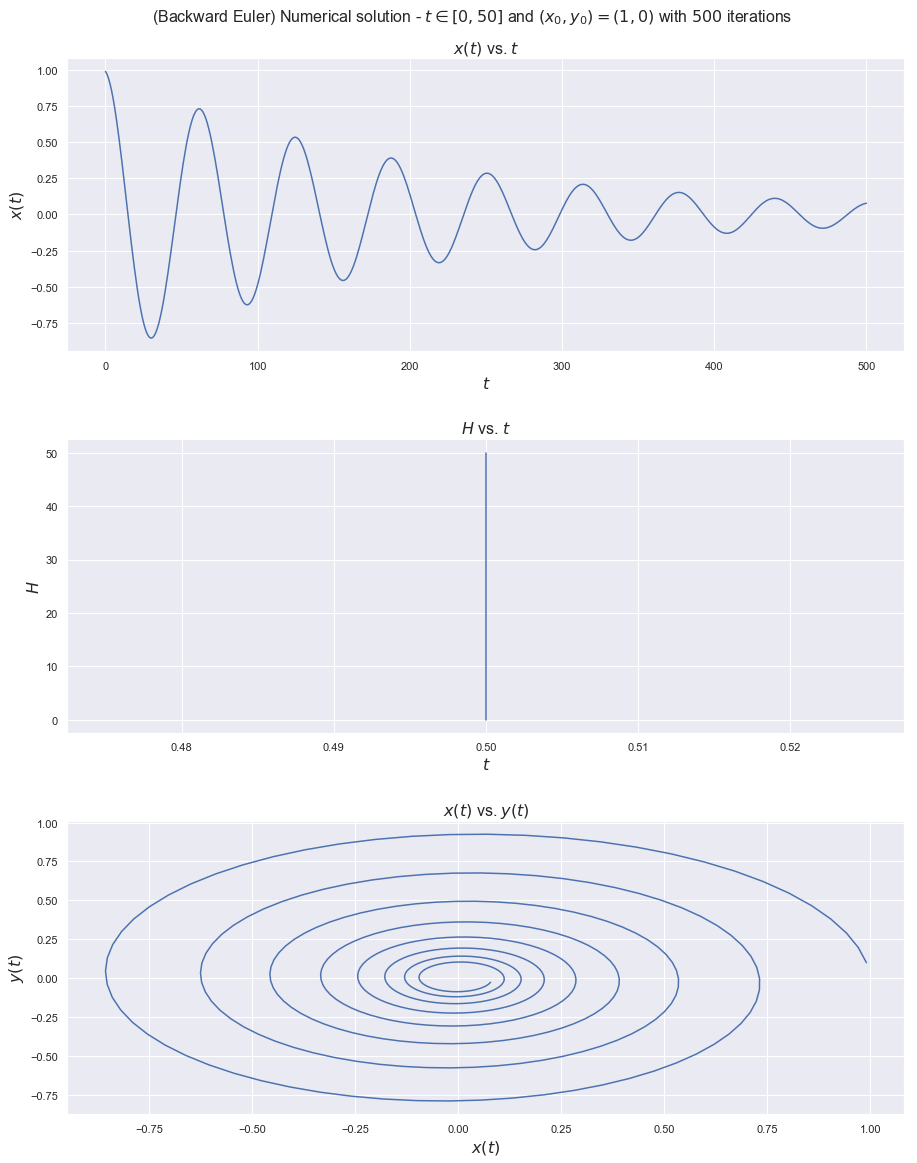

In [15]:
result = beuler(f, t=500)

start = (1, 0)
T = [0, 50]
t = 500
x_H_list = np.linspace(T[0], T[1], t + 1)
H_list = [H(t, start[0], start[1]) for t in x_H_list]


sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot(311)
ax2.plot(result[:,0])
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)

ax3 = plt.subplot(312)
ax3.plot(H_list, x_H_list)
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16);

ax = plt.subplot(313)
ax.plot(result[:,0], result[:,1])
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)

plt.suptitle("(Backward Euler) Numerical solution - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

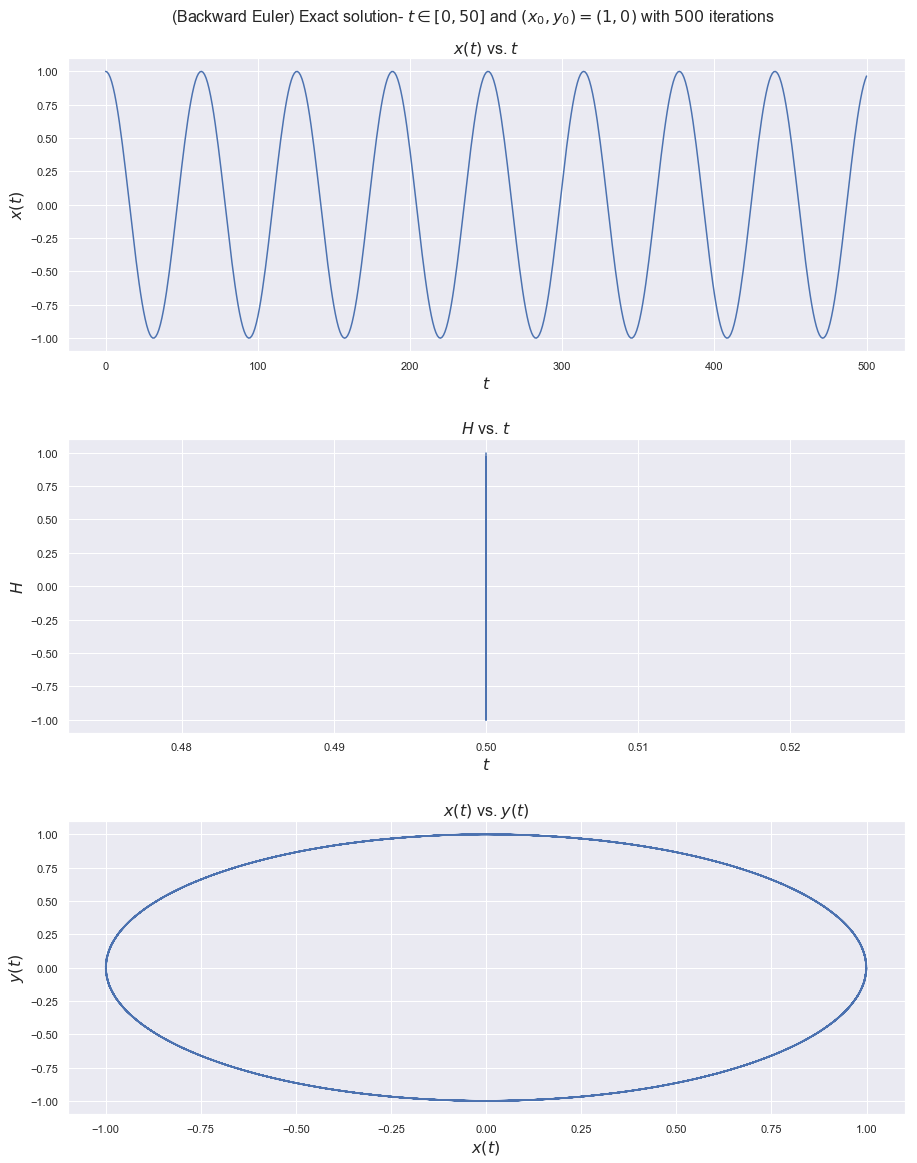

In [16]:
start = (1, 0)
T = [0, 50]
t = 500
xlist = [x(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
ylist = [y(t, start[0], start[1]) for t in np.linspace(T[0], T[1], t + 1)]
H_list = [H(t, start[0], start[1]) for t in xlist]


sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
fig.subplots_adjust(top = 0.94, hspace=0.3)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))

ax2 = plt.subplot(311)
ax2.plot(xlist)
ax2.set_ylabel("$x(t)$", fontsize = 16)
ax2.set_xlabel("$t$", fontsize=16)
ax2.set_title("$x(t)$ vs. $t$", fontsize=16)

ax3 = plt.subplot(312)
ax3.plot(H_list, xlist)
ax3.set_ylabel("$H$", fontsize=16)
ax3.set_xlabel("$t$", fontsize=16)
ax3.set_title("$H$ vs. $t$", fontsize=16);

ax = plt.subplot(313)
ax.plot(xlist, ylist)
ax.set_xlabel("$x(t)$", fontsize=16)
ax.set_ylabel("$y(t)$", fontsize=16)
ax.set_title("$x(t)$ vs. $y(t)$", fontsize=16)

plt.suptitle("(Backward Euler) Exact solution- $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $500$ iterations", fontsize=16);

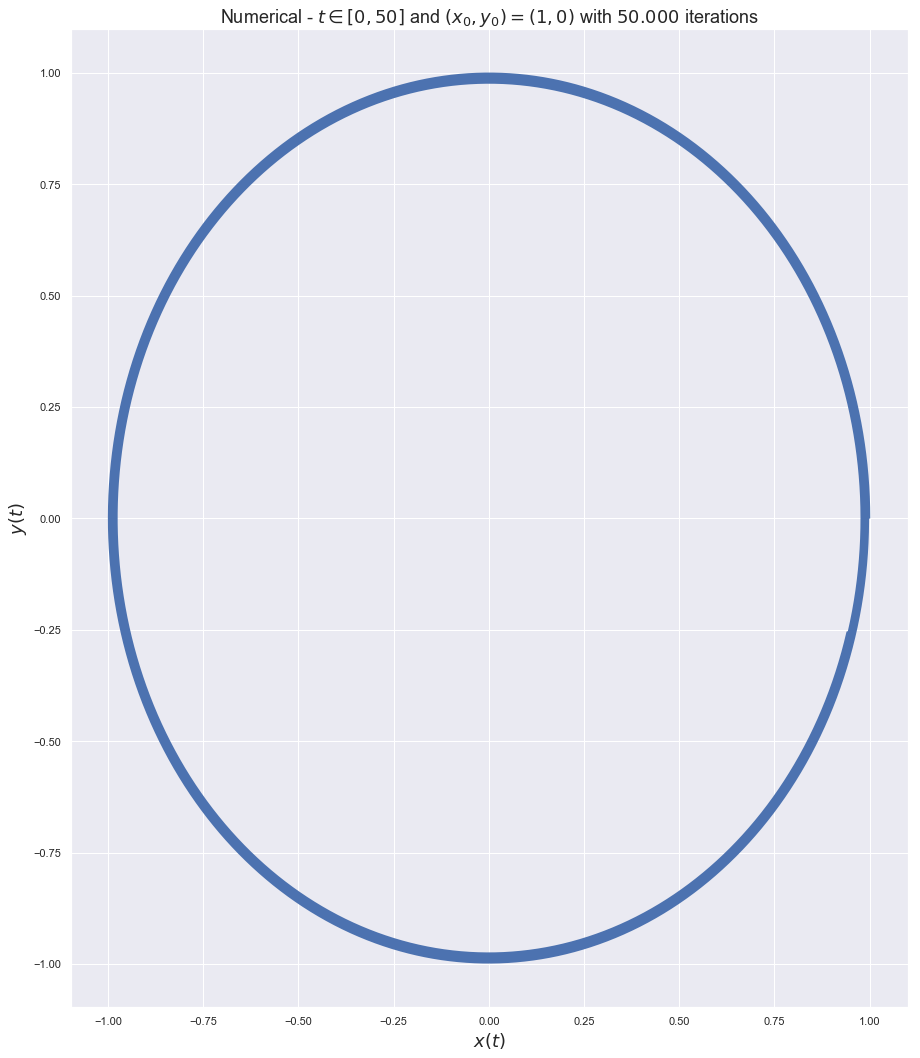

In [17]:
result = beuler(f, t=50000)
#  don't touch this
sns.set()
sns.set_style("darkgrid")
fig = plt.figure()
ax = plt.subplot(111)
colors = plt.cm.jet(np.linspace(0, 1, len(result)))
ax.plot(result[:,0], result[:,1])
ax.set_xlabel("$x(t)$", fontsize=18)
ax.set_ylabel("$y(t)$", fontsize=18)
ax.set_title("Numerical - $t\in[0,50]$ and $(x_0,y_0) = (1,0)$ with $50.000$ iterations", fontsize=18);

----
## Exercise 7
Experiment with an integration schemes that gives higher order accuracy. Can you verify the order of accuracy with your numerical experiments? Does it conserve the Hamiltonian?

----
## Exercise 8
It is far from trivial that a time integration method respects conservation properties of the systems of ODEs, such as energy conservation. The topic of *{geometric numerical integration}* deals with integration methods that are structure-preserving; preserving the Hamiltonian structure (and thereby the Hamiltonian itself) is one example.



The Störmer -Verlet (SV) scheme preserves the symplectic structure of Hamiltonian systems. For a general set of ODEs given by $dx/dt = f(y), \,\, dy/dt = g(x)$, the SV scheme with time step $\Delta t$ reads
$$\begin{array}{rcl}
    y^* & = & y_k + \frac{1}{2} \Delta t \cdot g(x_k) \\
    x_{k+1} & = & x_k + \Delta t \cdot f(y^*) \\
    y_{k+1} & = & y^* + \frac{1}{2} \Delta t \cdot g(x_{k+1}).
\end{array}$$

Use this scheme to integrate the ODEs of the harmonic oscillator. Compare with the results from other integration schemes.

What happens with the Hamiltonian when using the SV scheme? What is the order of accuracy of the SV scheme?

In [18]:
def y_star(t, x0, y0, h, w=1):

    h = h
    return y(t, x0, y0, w=1) + 0.5 * h * dy(x(t, x0, y0, w=1), t, w=1)

def xk_plus(t, x0, y0, h, w=1):

    h = h
    xk = x(t, x0, y0, w=1)
    return xk + h * dx(y_star(t, x0, y0, h, w=1), t)

def yk_plus(t, x0, y0, h, w=1):

    h = h
    ystar = y_star(t, x0, y0, h, w=1)
    xkplus = xk_plus(t, x0, y0, h, w=1)
    return ystar + 0.5 * h * dy(xkplus, t, w=1)

In [24]:
T = [0, 50]
t = 1000
h = (T[1]-T[0])/t
start = (-0.5, 0.5)

xs_list1 = [xk_plus(t, start[0], start[1], h=h) for t in np.linspace(T[0], T[1], t + 1)]
ys_list1 = [yk_plus(t, start[0], start[1], h=h) for t in np.linspace(T[0], T[1], t + 1)]
H_list = [H(t, xs_list1[i], ys_list1[i]) for i, t in enumerate(xs_list1)]

In [25]:
len(xs_list1) == len(ys_list1)

True

In [35]:
xs_list1[6], ys_list1[6]

(-0.2982243386609194, 0.641131659890799)

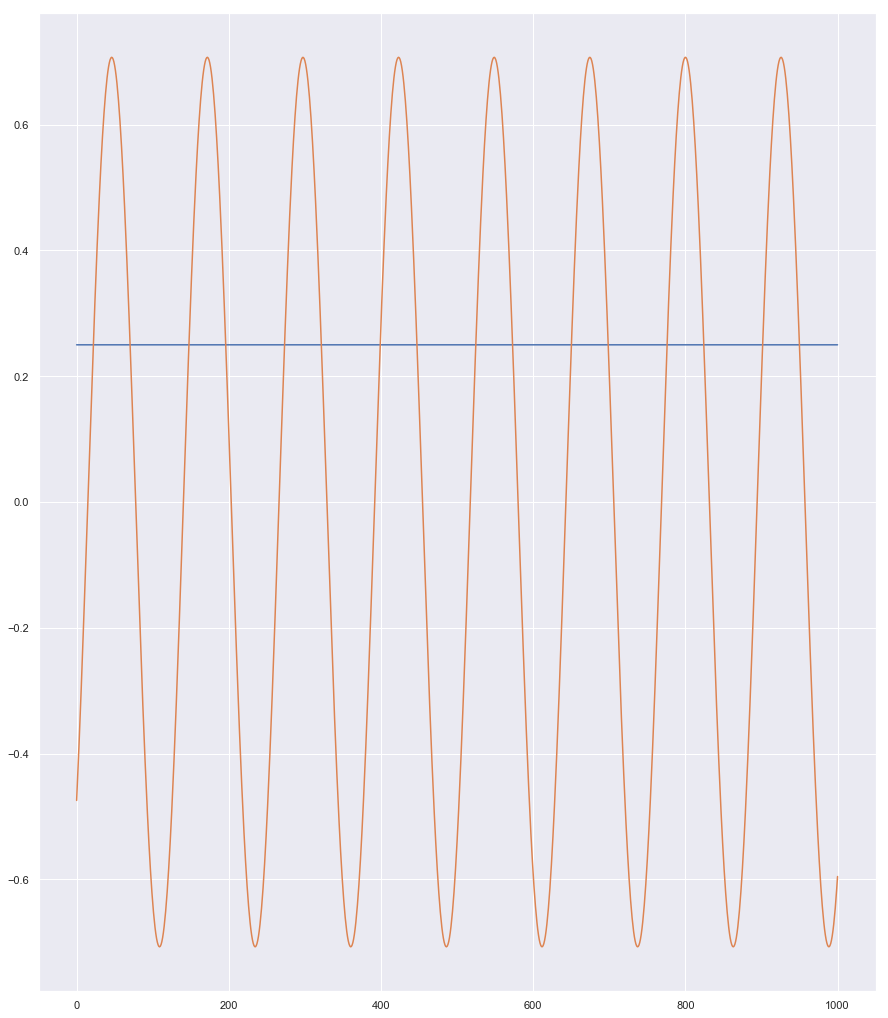

In [26]:
ax = plt.subplot(111)

ax.plot(H_list)
ax.plot(xs_list1);